## Homework #4 - MAE 598
-Sebastian Garcia Peralta
1213082648


### Problem 1 (10 Points)

Sketch graphically the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad f({\bf x})=(x_1+1)^2+(x_2-2)^2\\
{\text{subject to }} & \quad g_1 = x_1-2\leq 0,{\quad} g_3 = -x_1\leq 0,\\
& \quad g_2 = x_2-1\leq 0, {\quad} g_4 = -x_2\leq 0.
\end{aligned}
$$

Find the optimum graphically. Determine directions of feasible descent at the corner points of the feasible domain. Show the gradient directions of $f$ and $g_i$s at these points. Verify graphical results analytically using the KKT conditions.

### Problem 2 (10 Points)

Graph the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=-x_1\\
{\text{subject to }} & \quad g_1=x_2-(1-x_1)^3\leq 0{\quad} {\rm and}{\quad} x_2\geq 0.
\end{aligned}
$$ 

Find the solution graphically. Then apply the optimality conditions. Can you find a solution based on the optimality conditions? Why? (From Kuhn and Tucker, 1951.)

### Problem 3 (30 Points)

Find a local solution to the problem 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_1x_2+x_2x_3+x_1x_3\\
{\text{subject to }} & \quad h=x_1+x_2+x_3-3=0.
\end{aligned}
$$ 

Use two methods: reduced gradient and Lagrange multipliers.

### Problem 4 (20 Points)

Use reduced gradient to	find the value(s) of the parameter $b$ for which the point $x_1=1$, $x_2=2$ is the solution to the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=2x_{1} + bx_2\\
{\text{subject to }} & \quad g_1 = x_{1}^{2}+ x_{2}^{2}-5\leq 0\\
& \quad g_2= x_1- x_2-2\leq 0.
\end{aligned}
$$ 

### Problem 5 (30 Points)

Find the solution for 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_{1}^{2}+x_{2}^{2}+x_{3}^{2}\\
{\text{subject to }} & \quad h_1 = x_{1}^{2}/4+x_{2}^{2}/5+x_{3}^{2}/25-1=0\\
& \quad h_2 = x_1+x_2-x_3= 0,
\end{aligned}
$$ 

by implementing the generalized reduced gradient algorithm.

## Problem 1
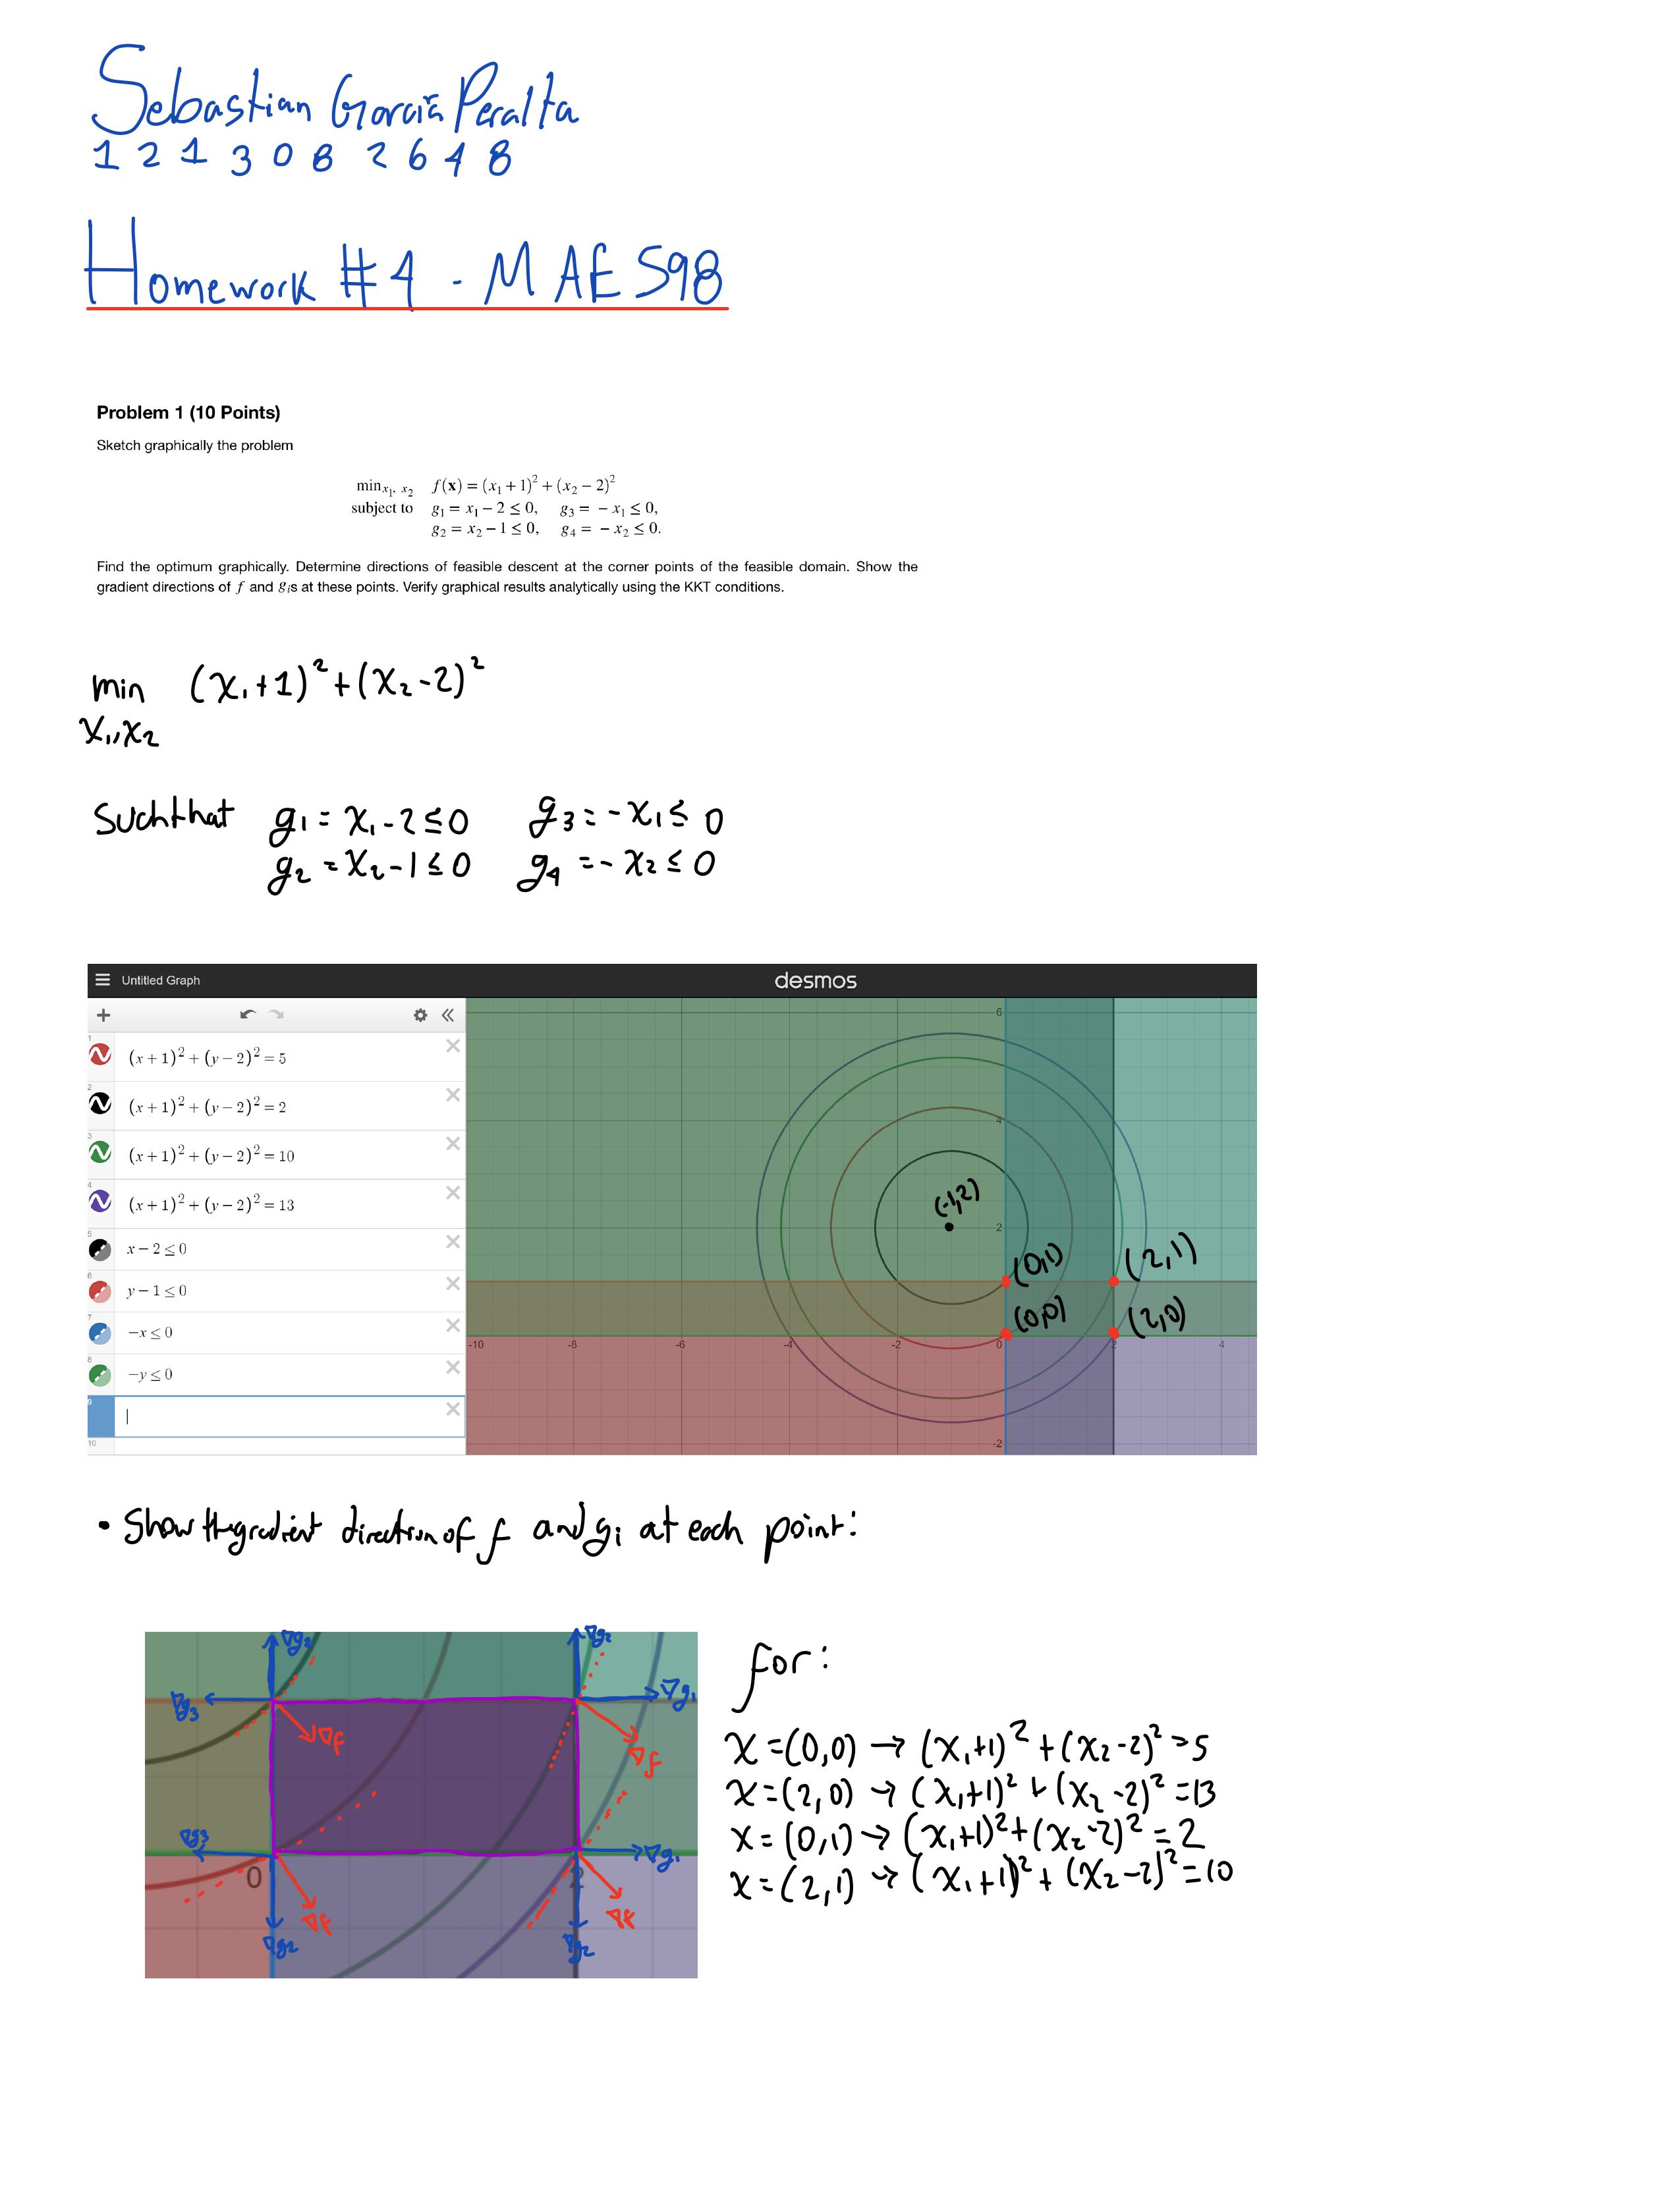


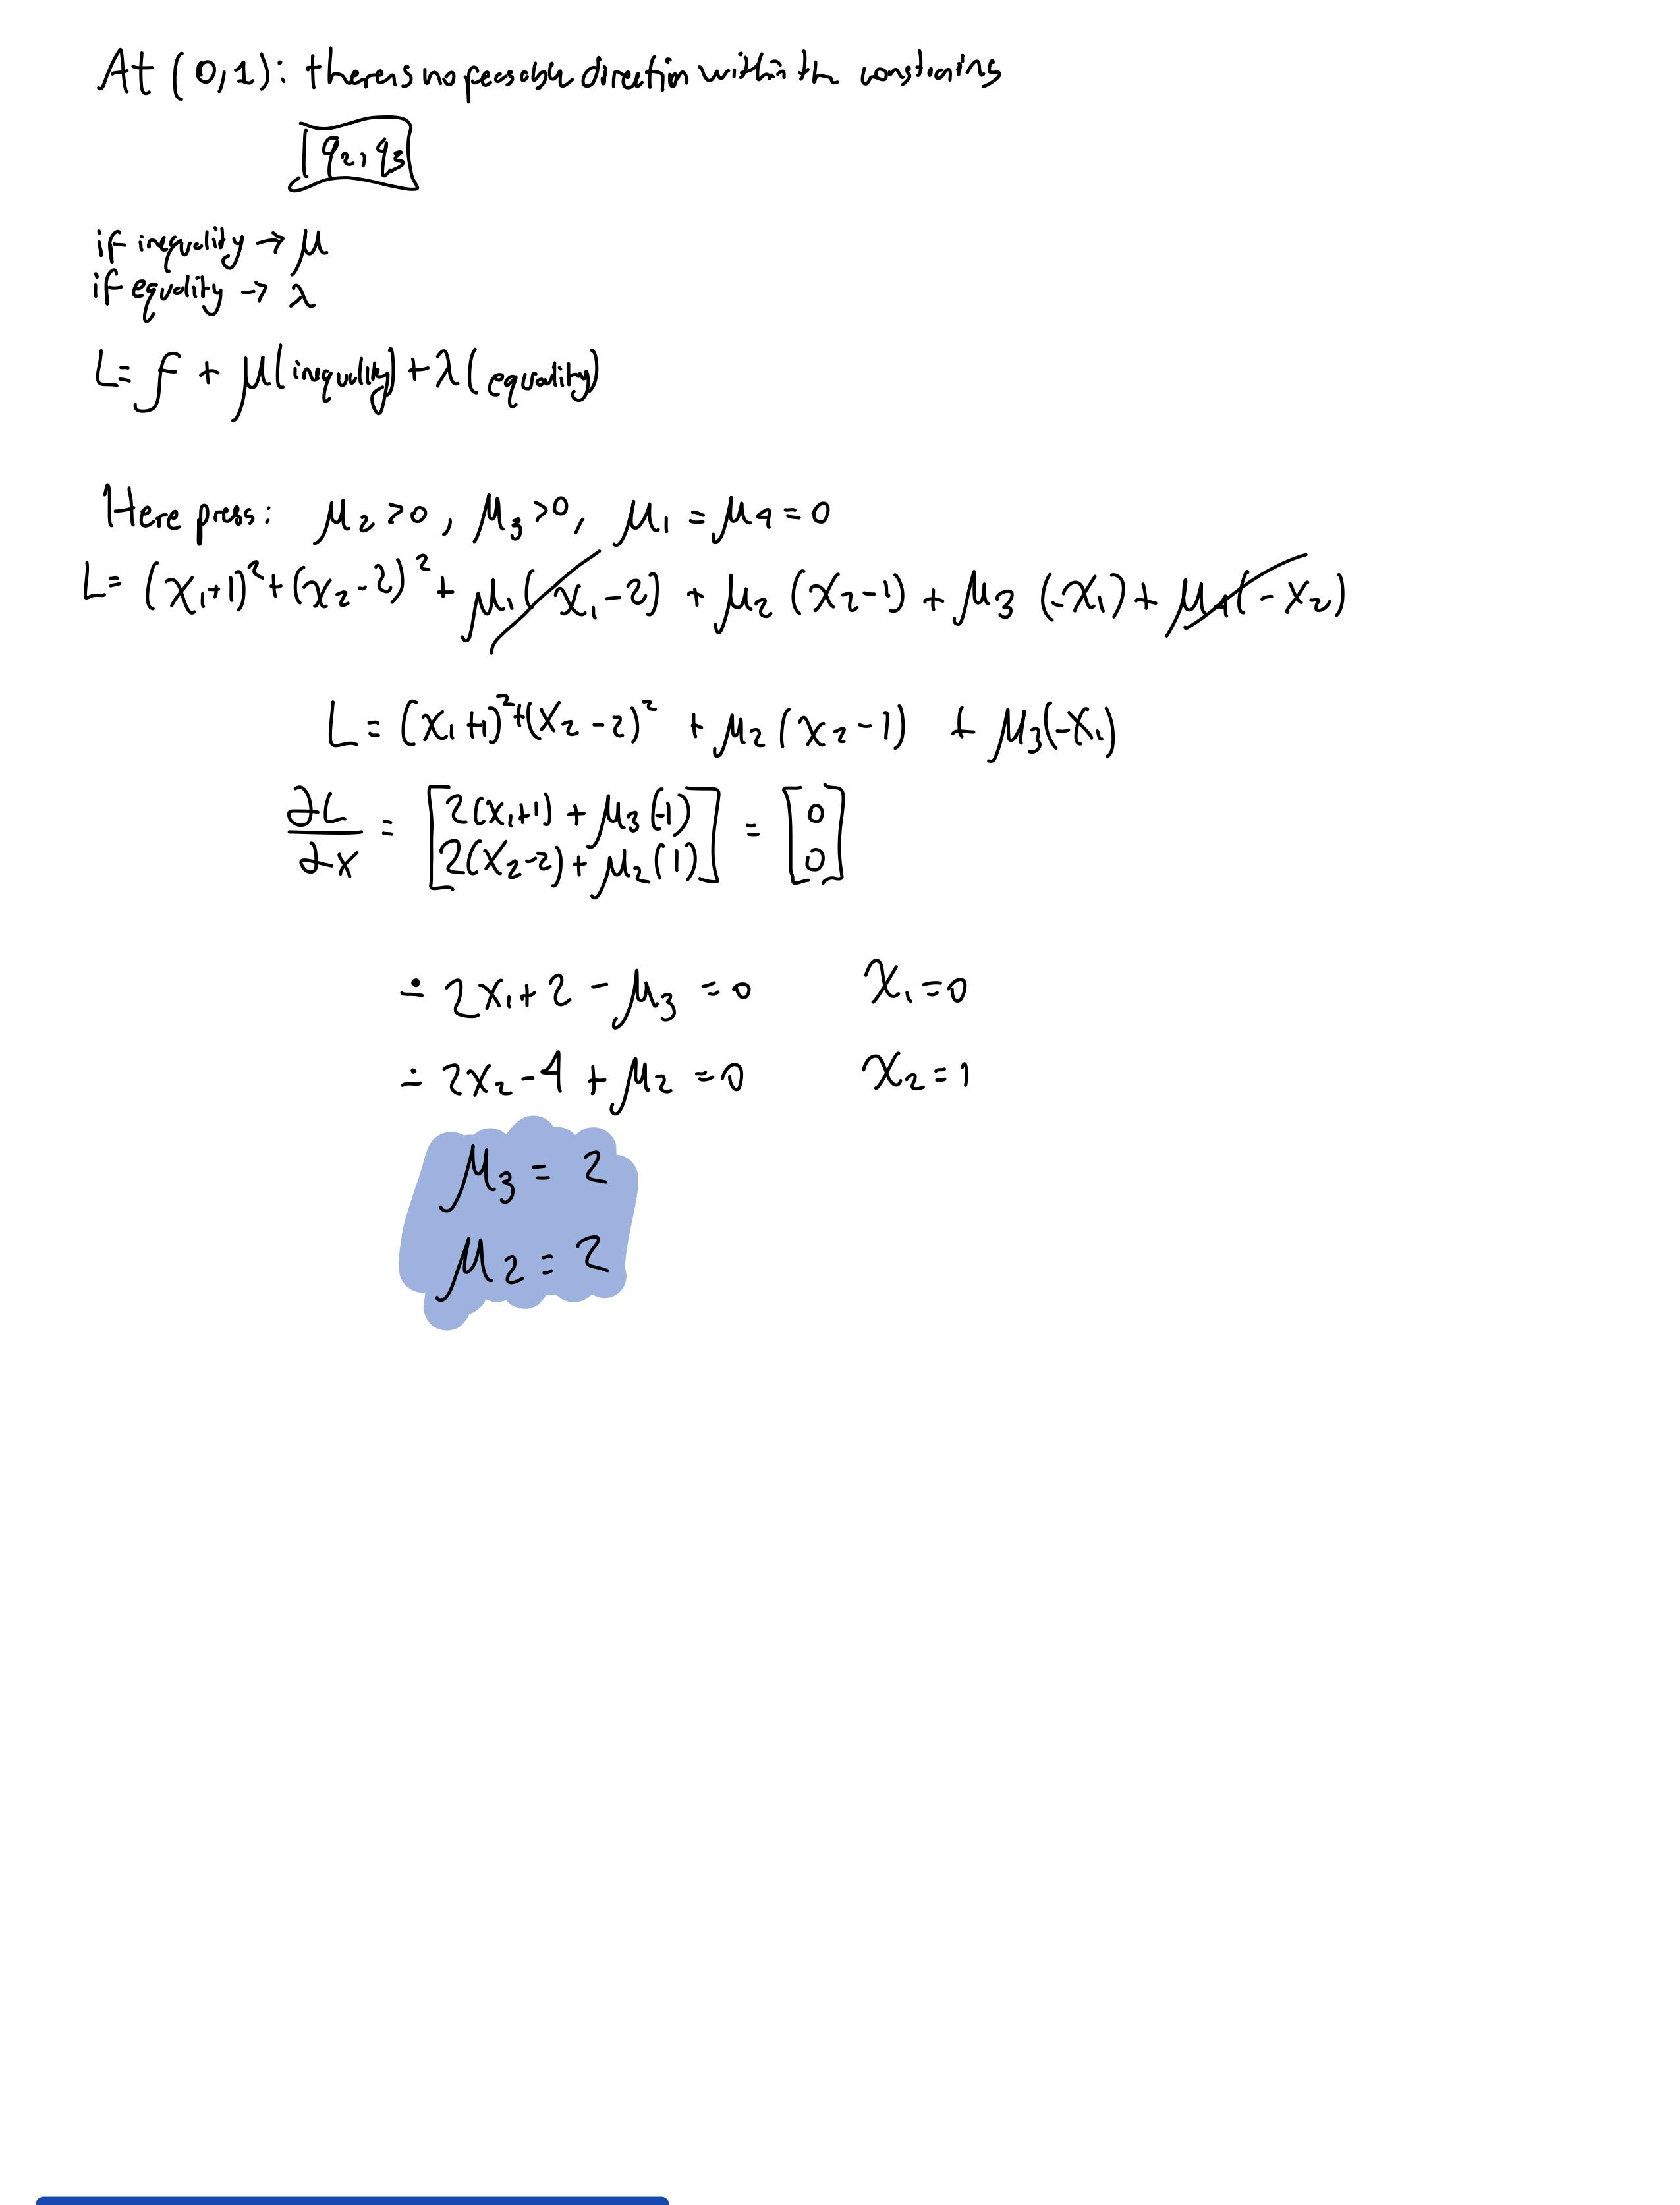

## Problem 2
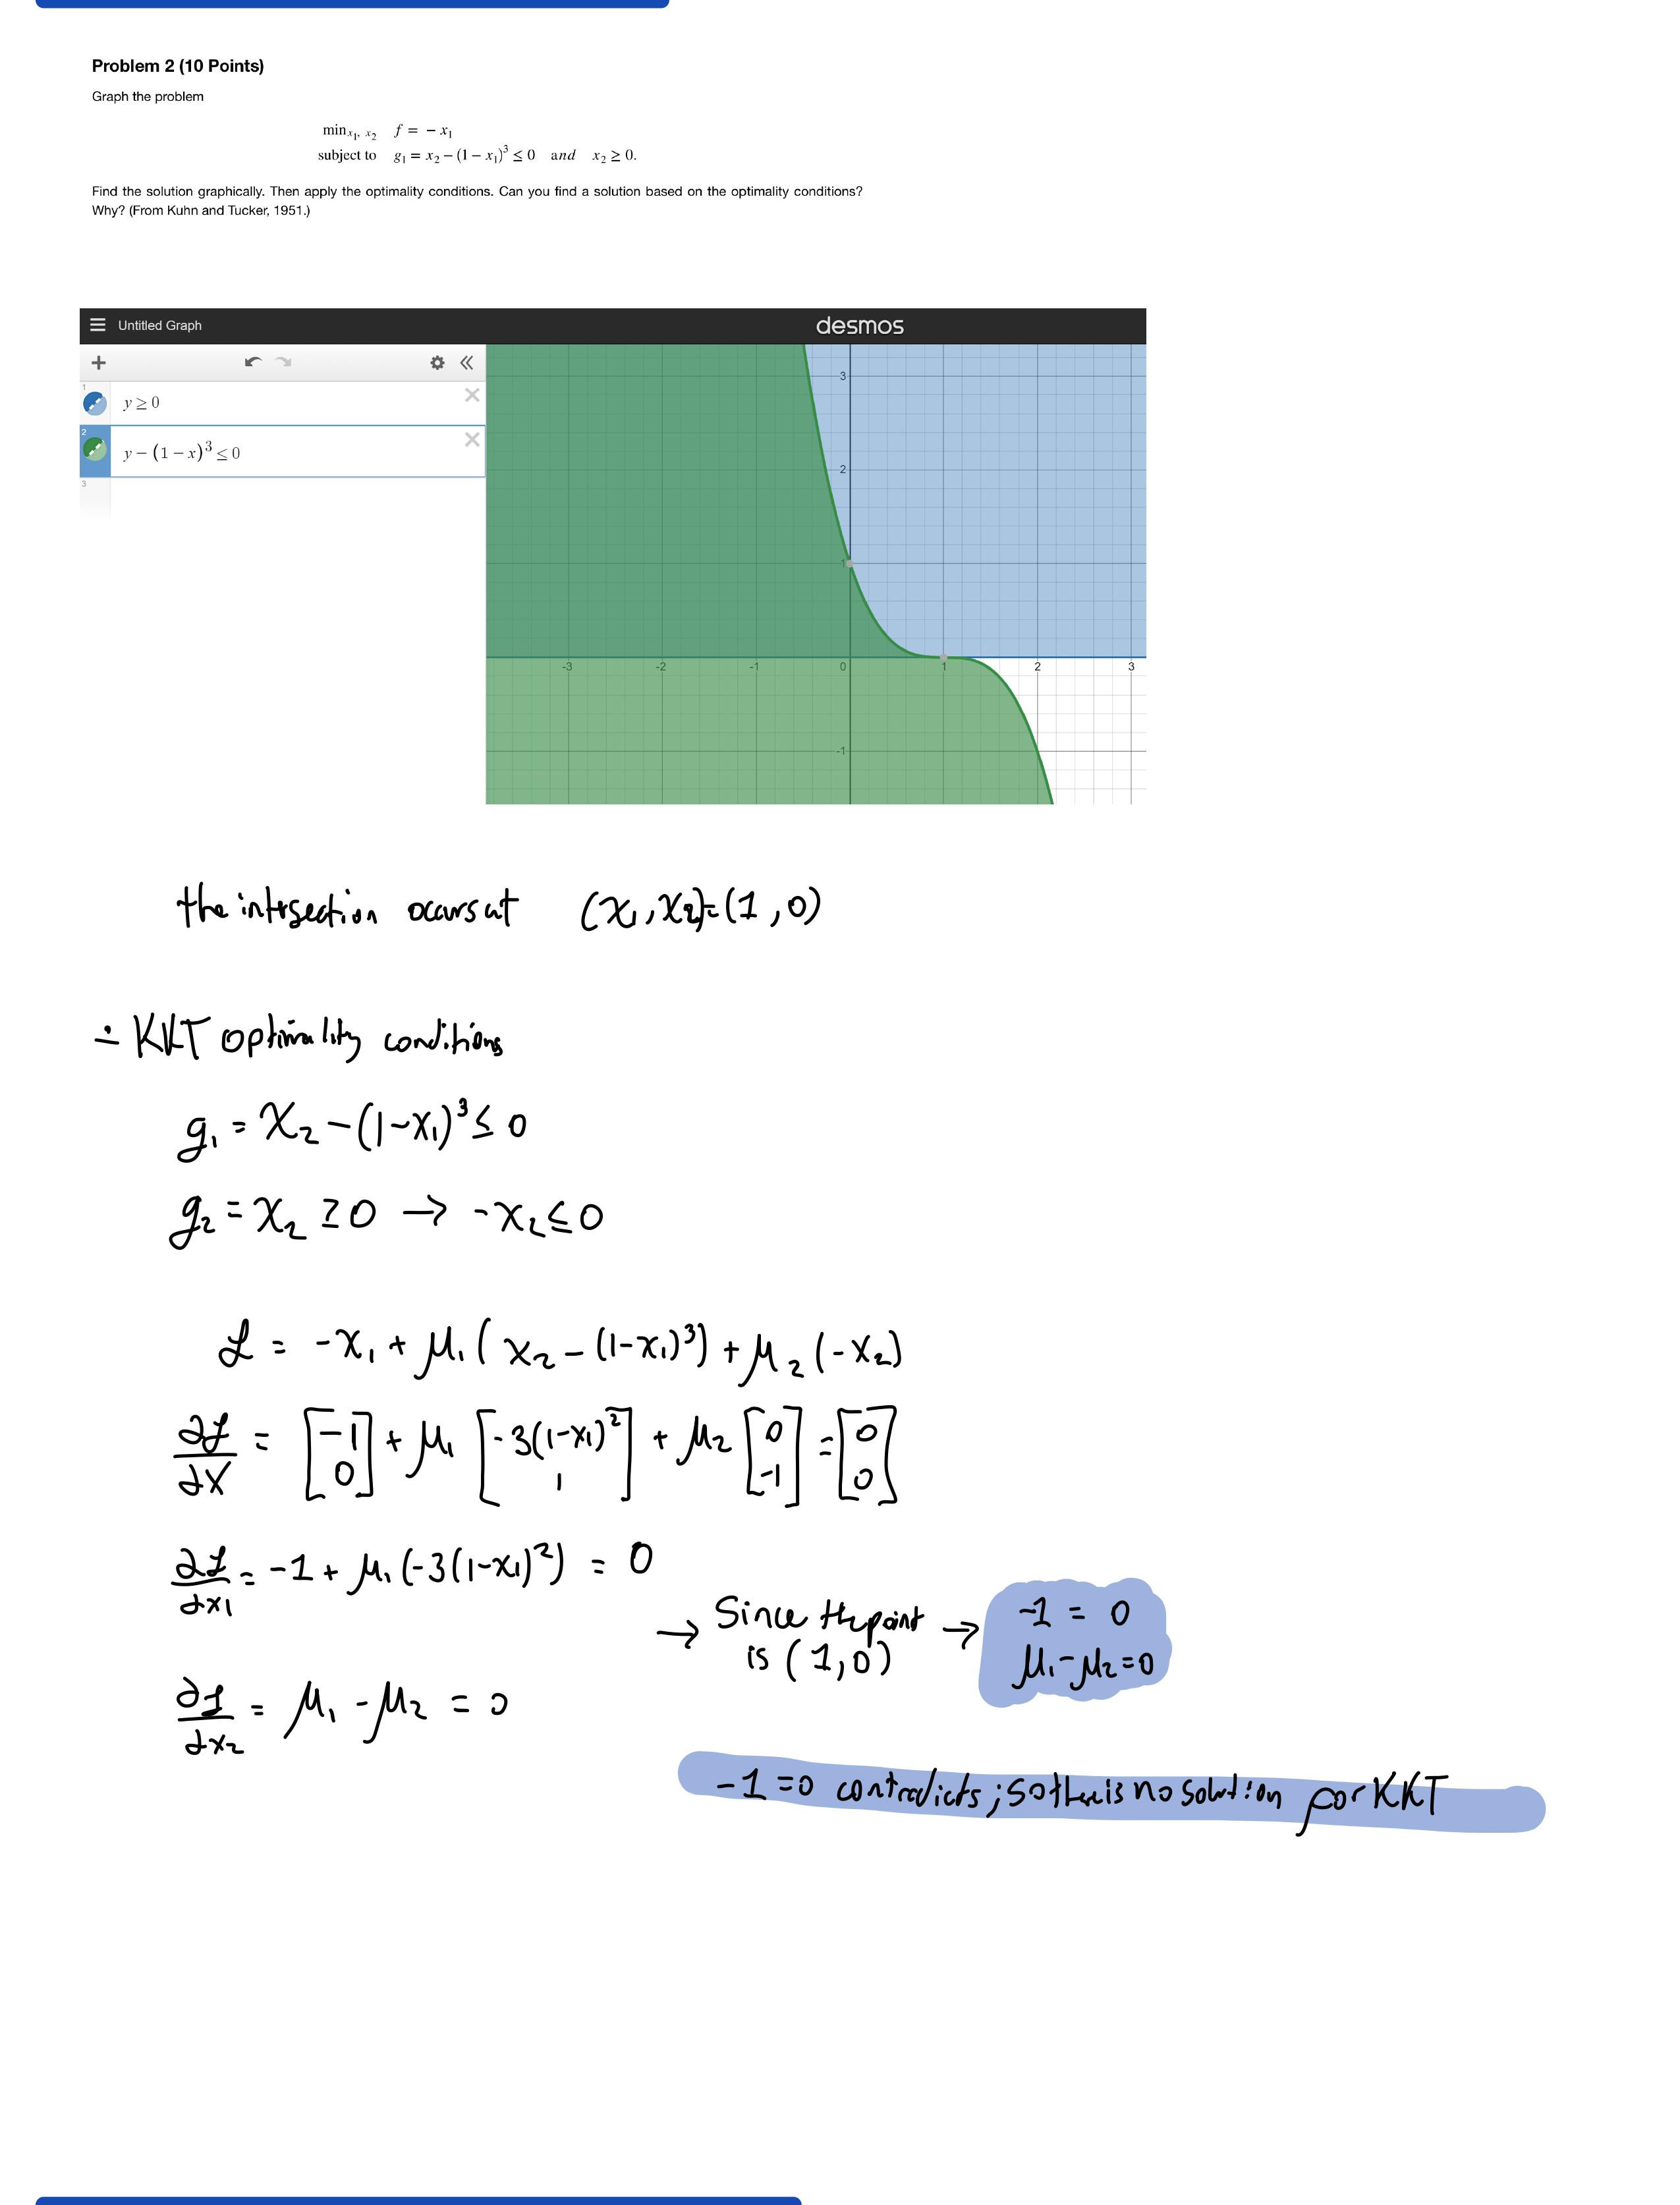

## Problem 3
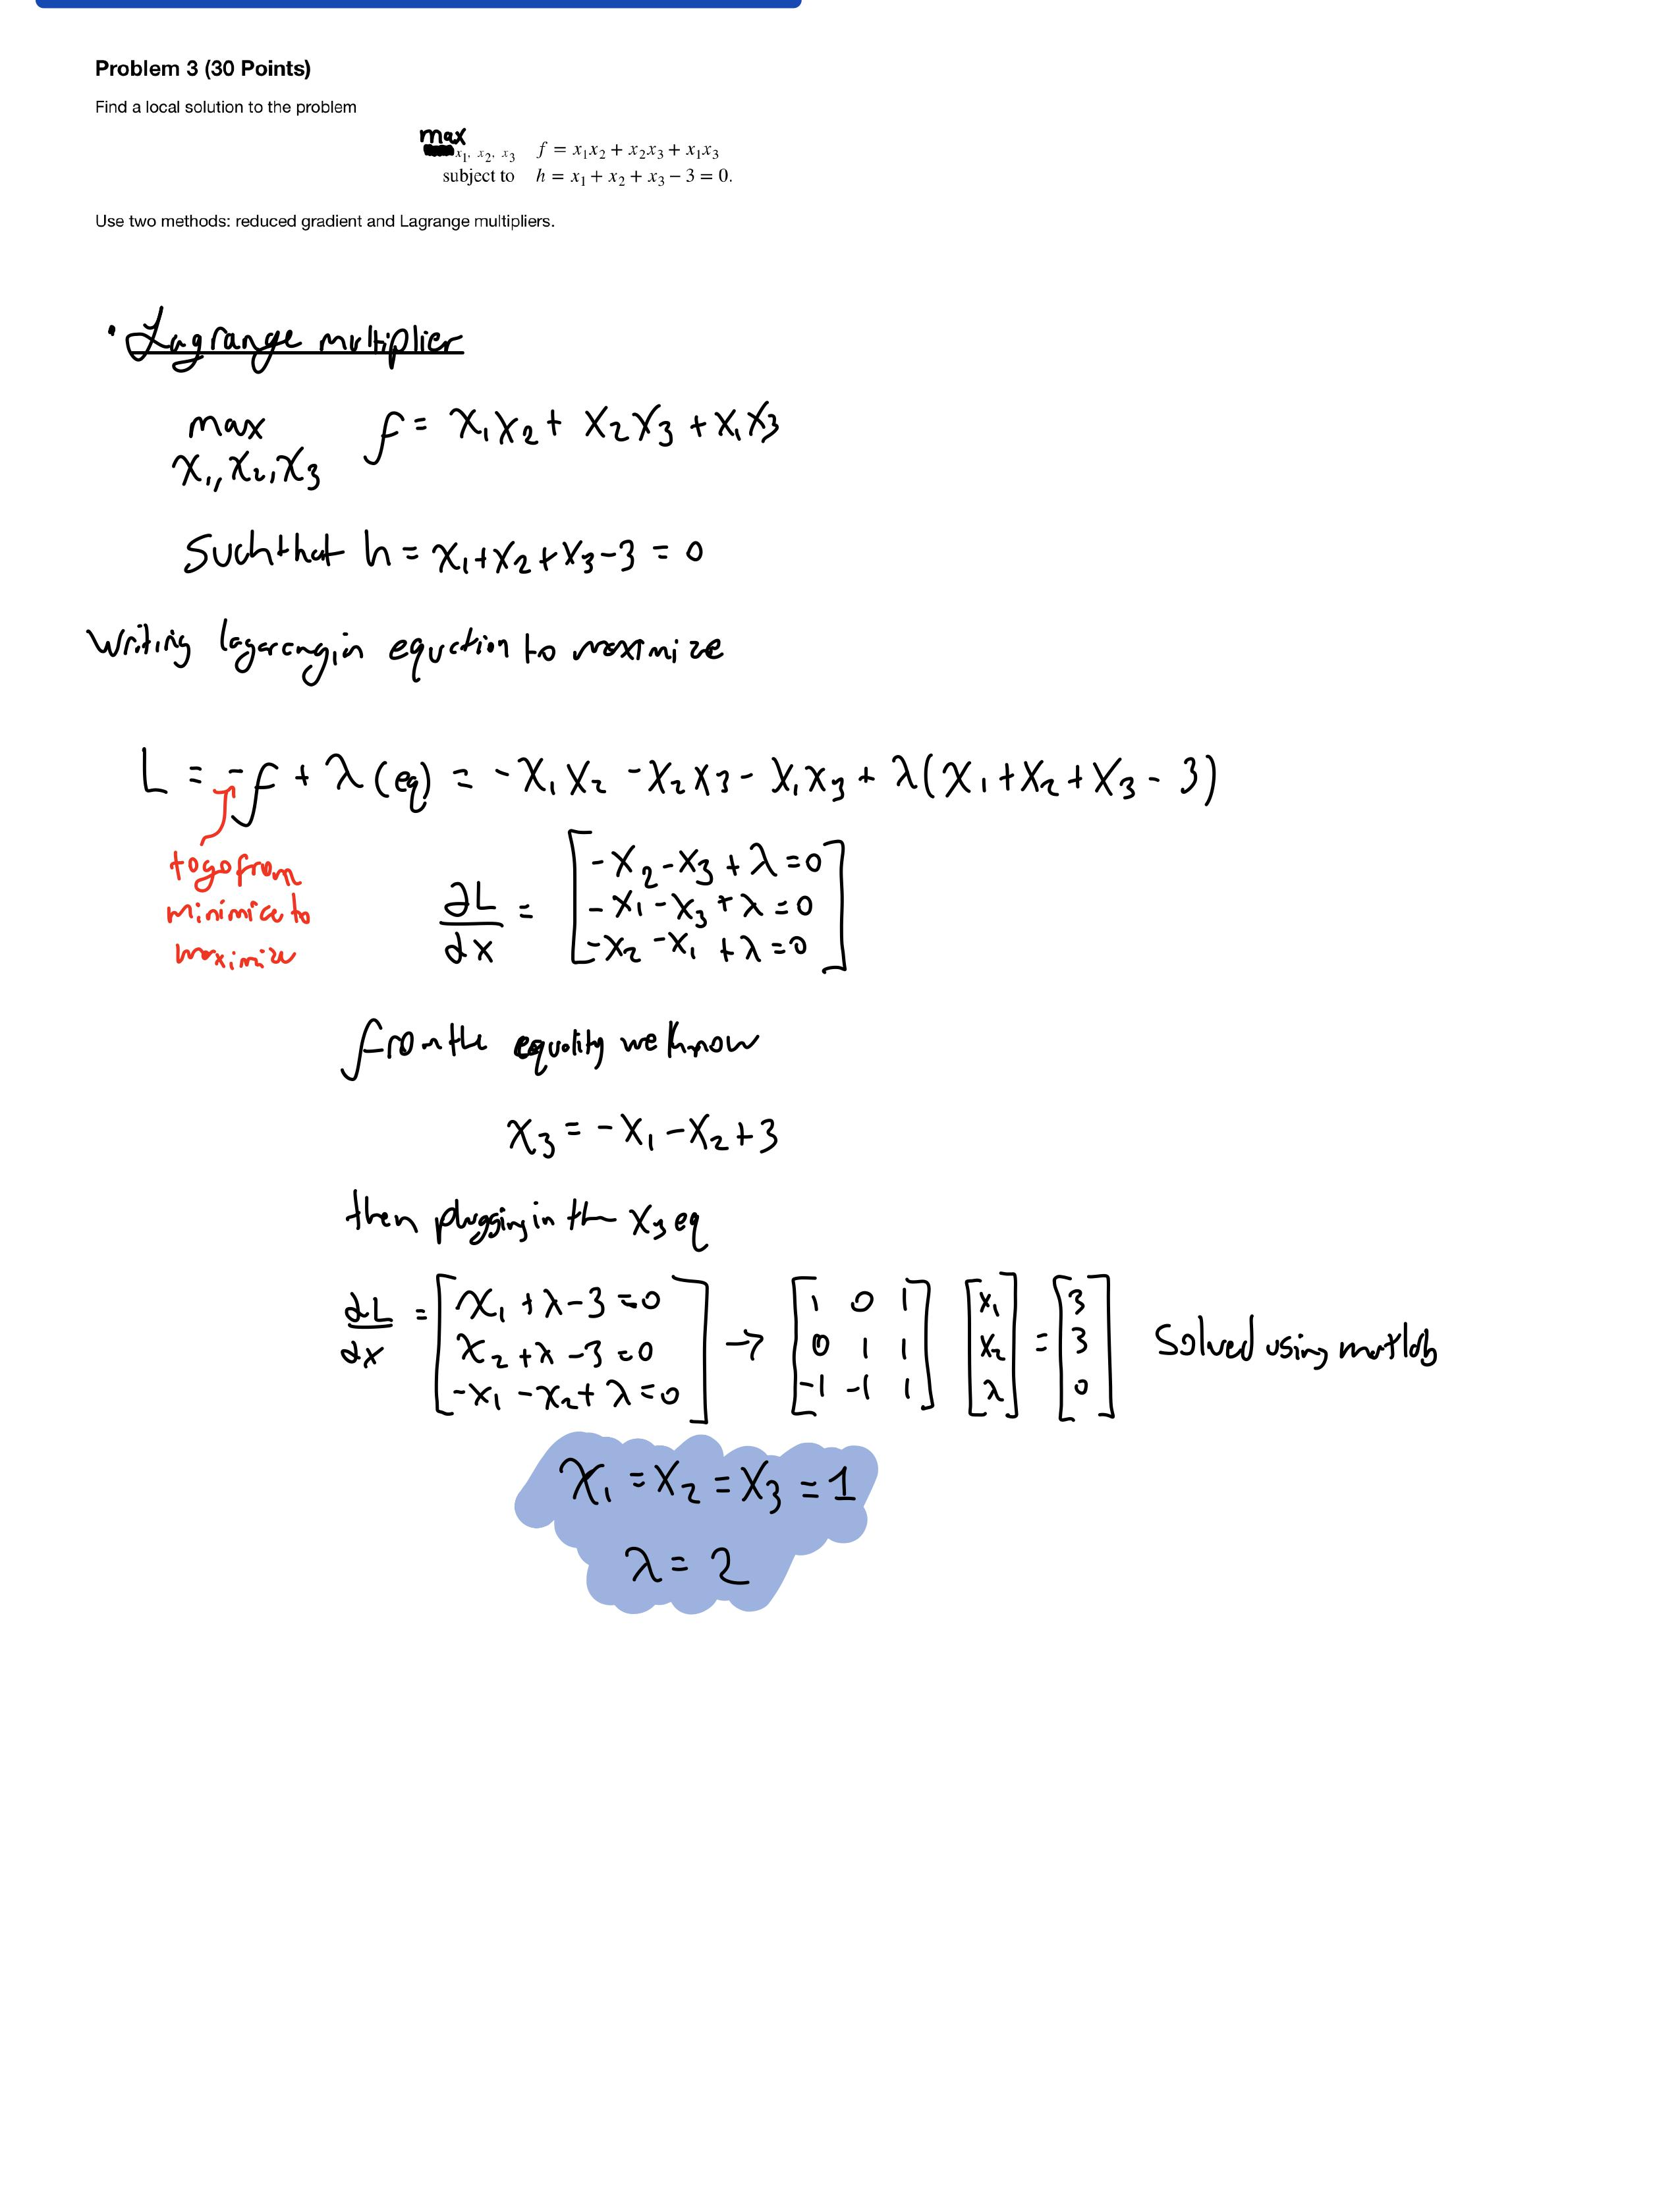

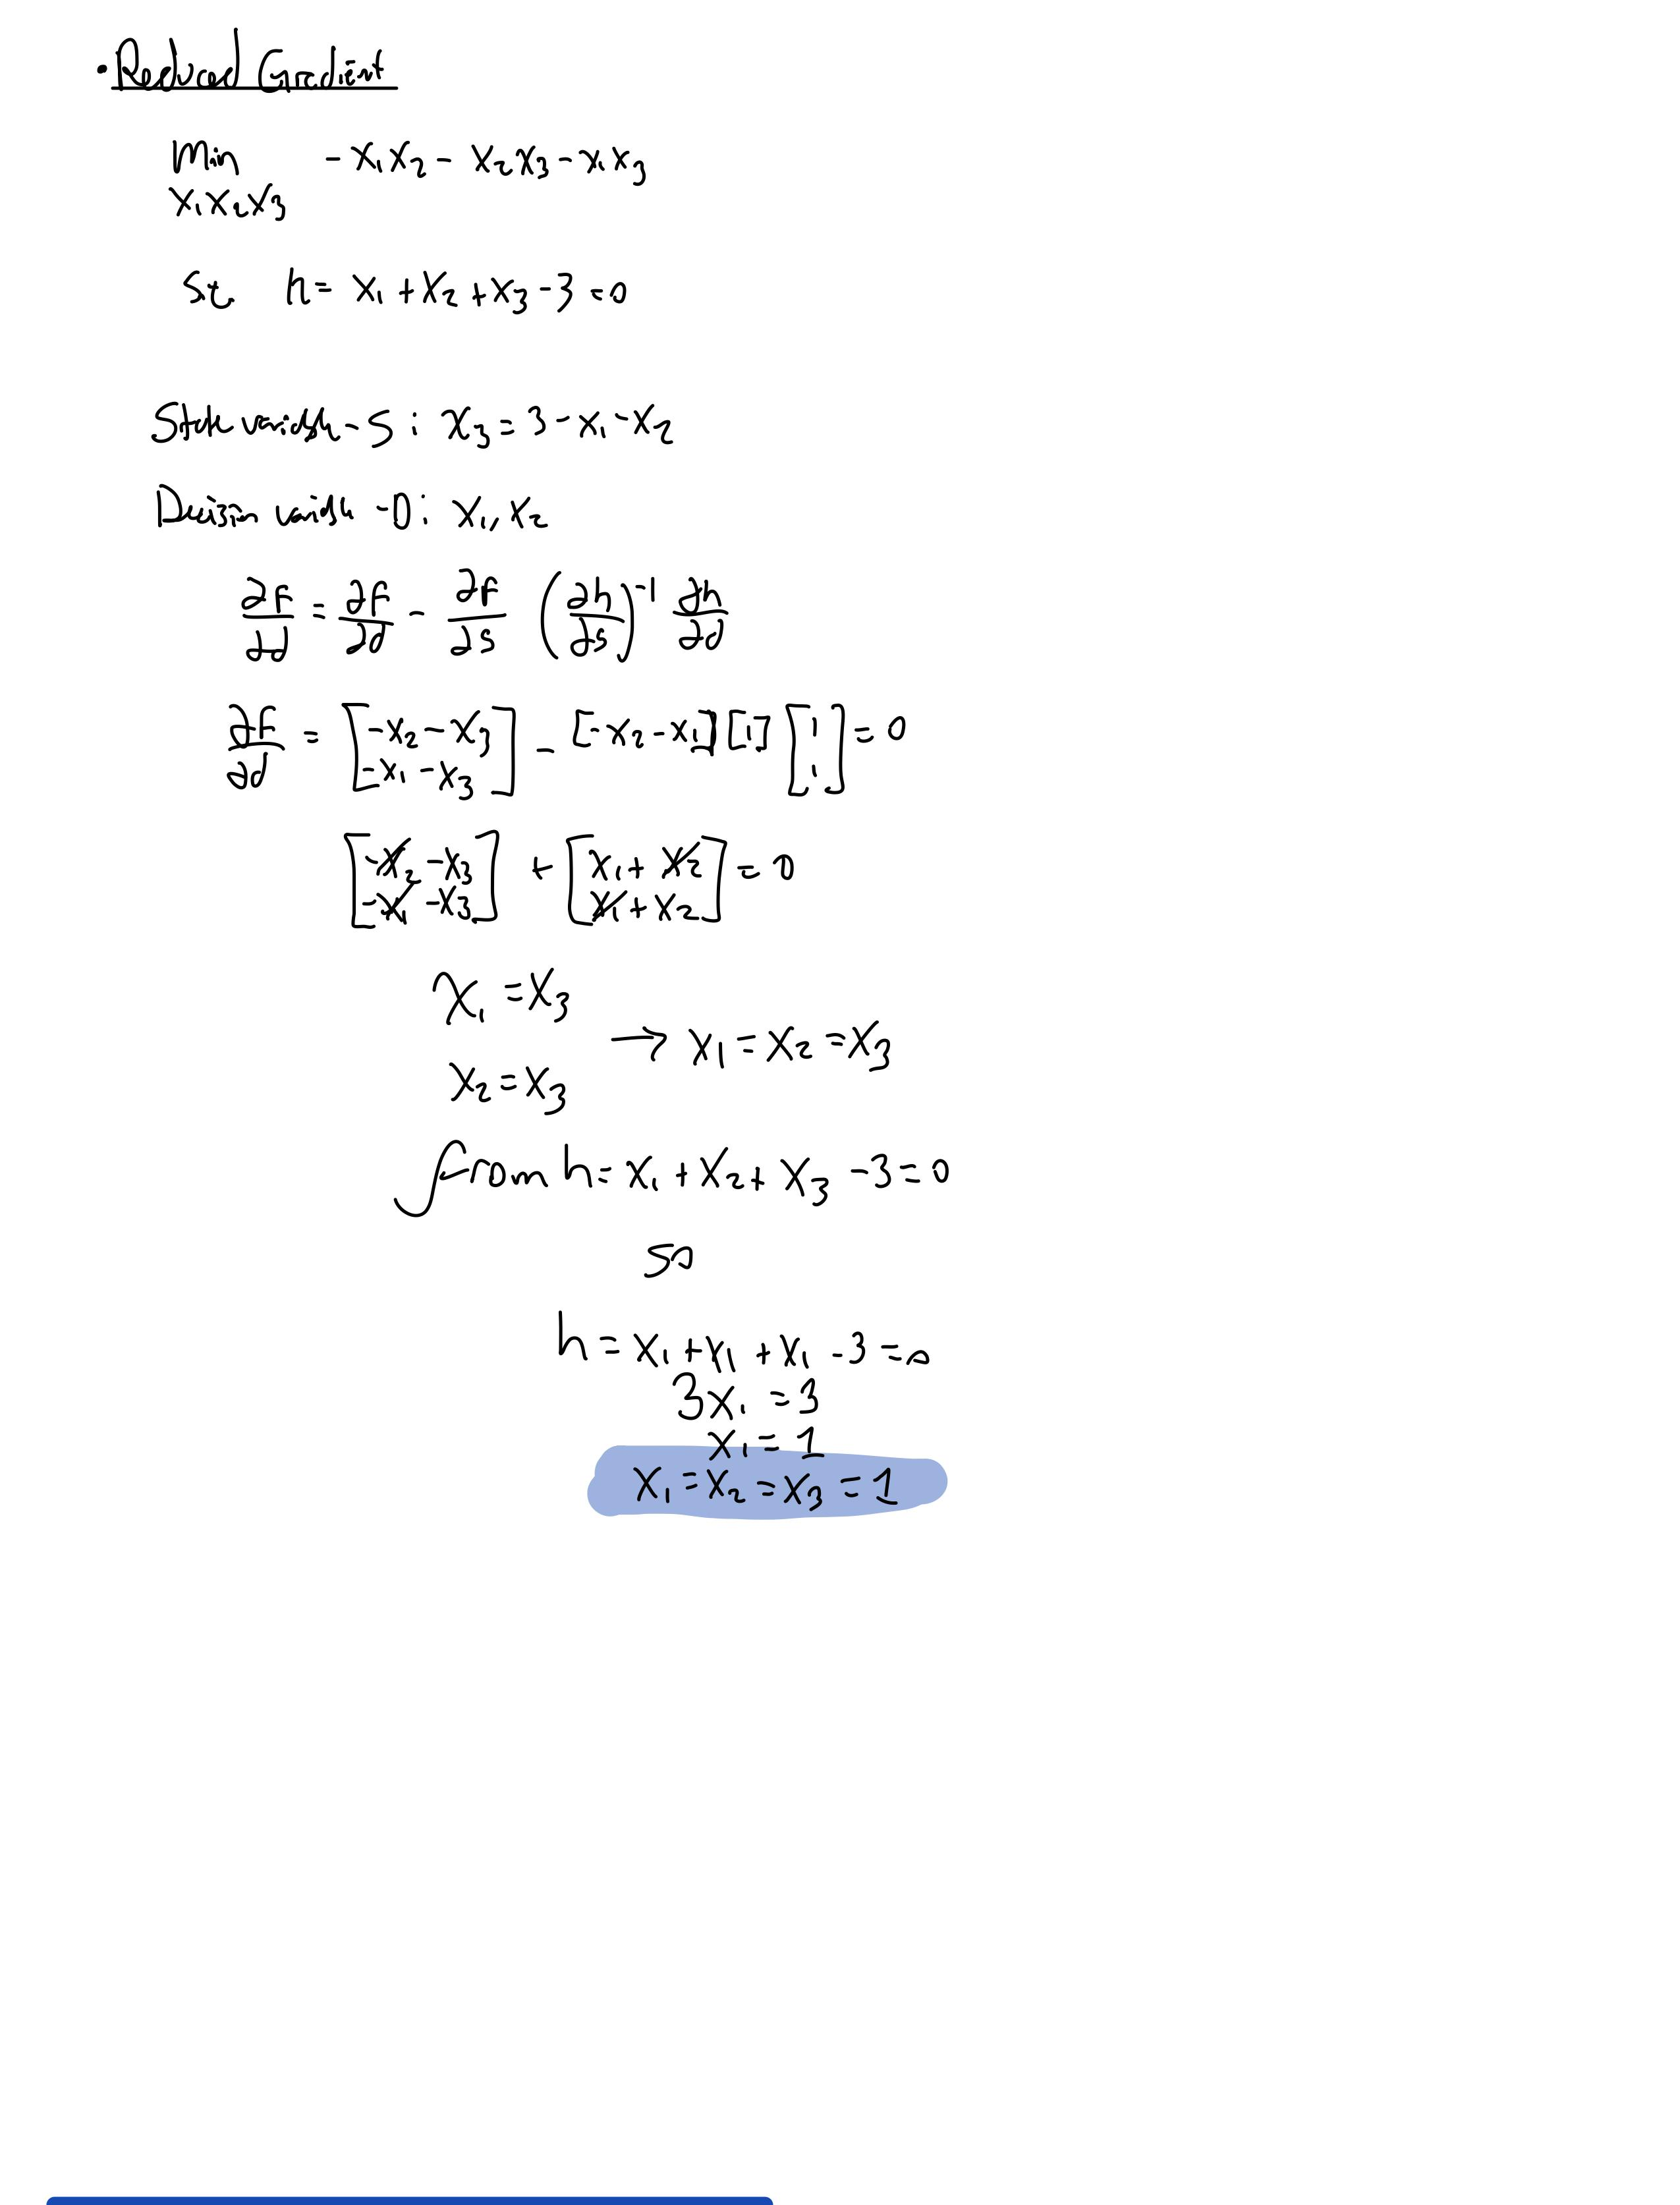

## Problem 4
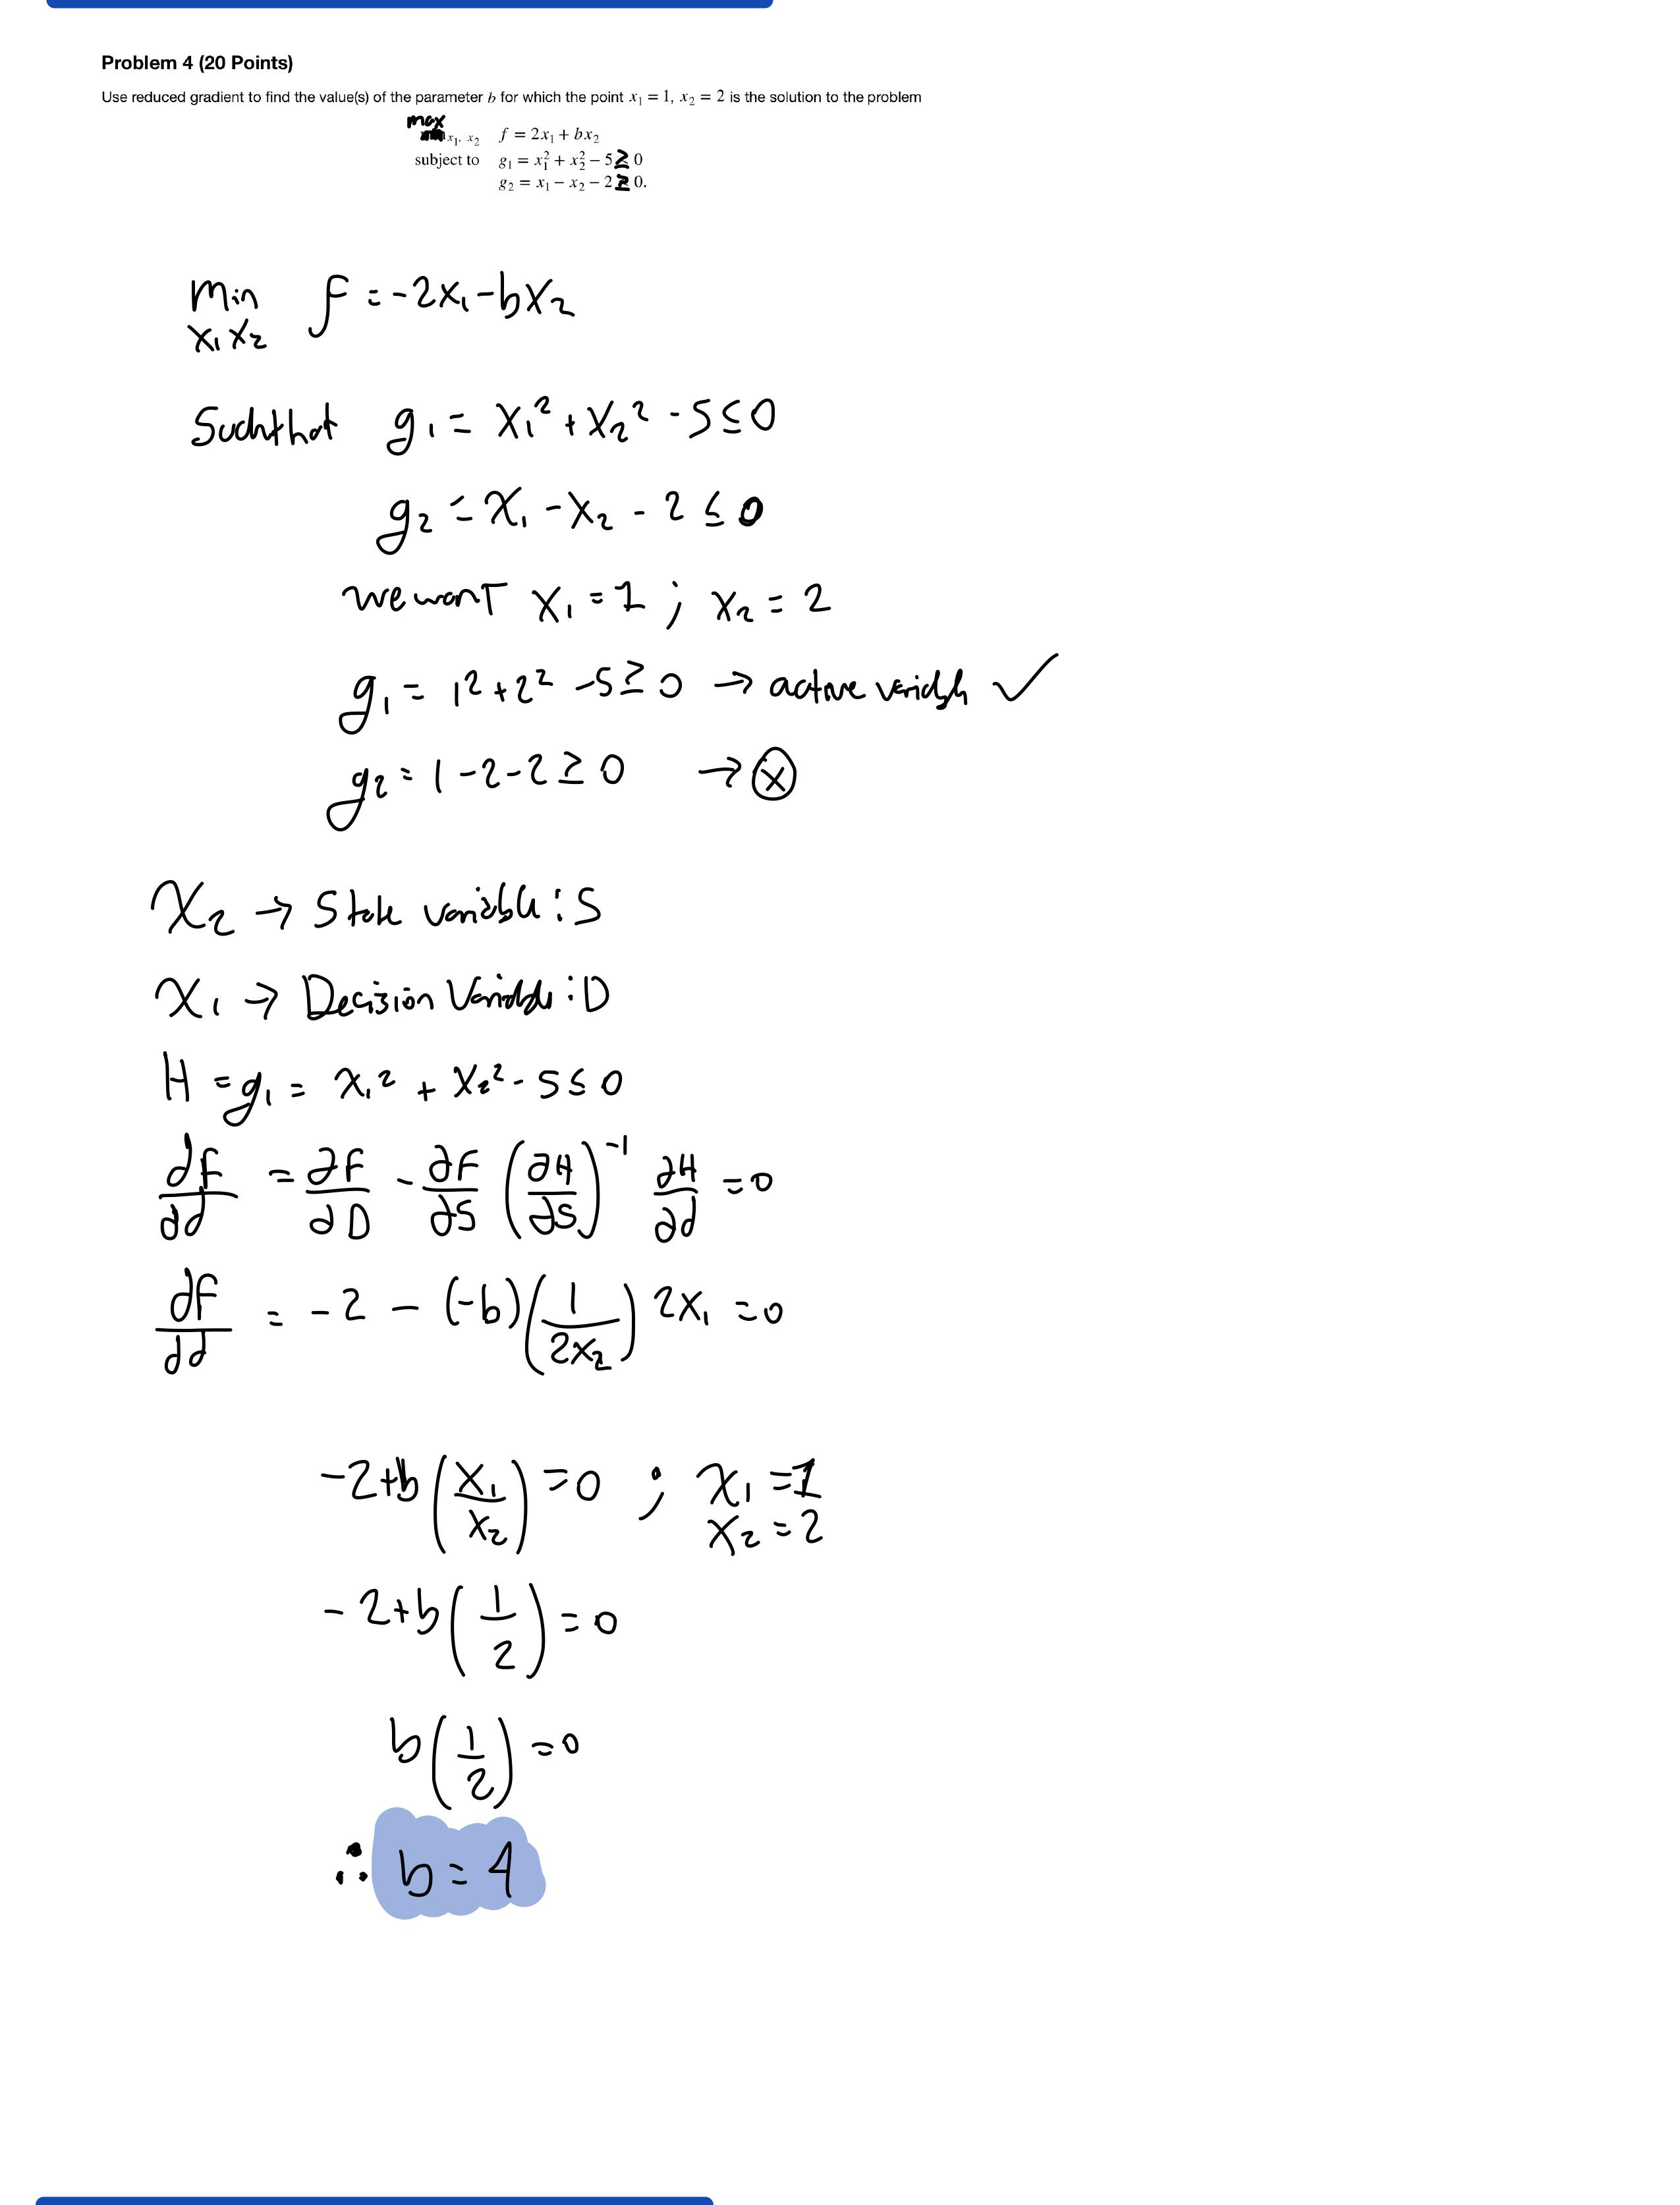

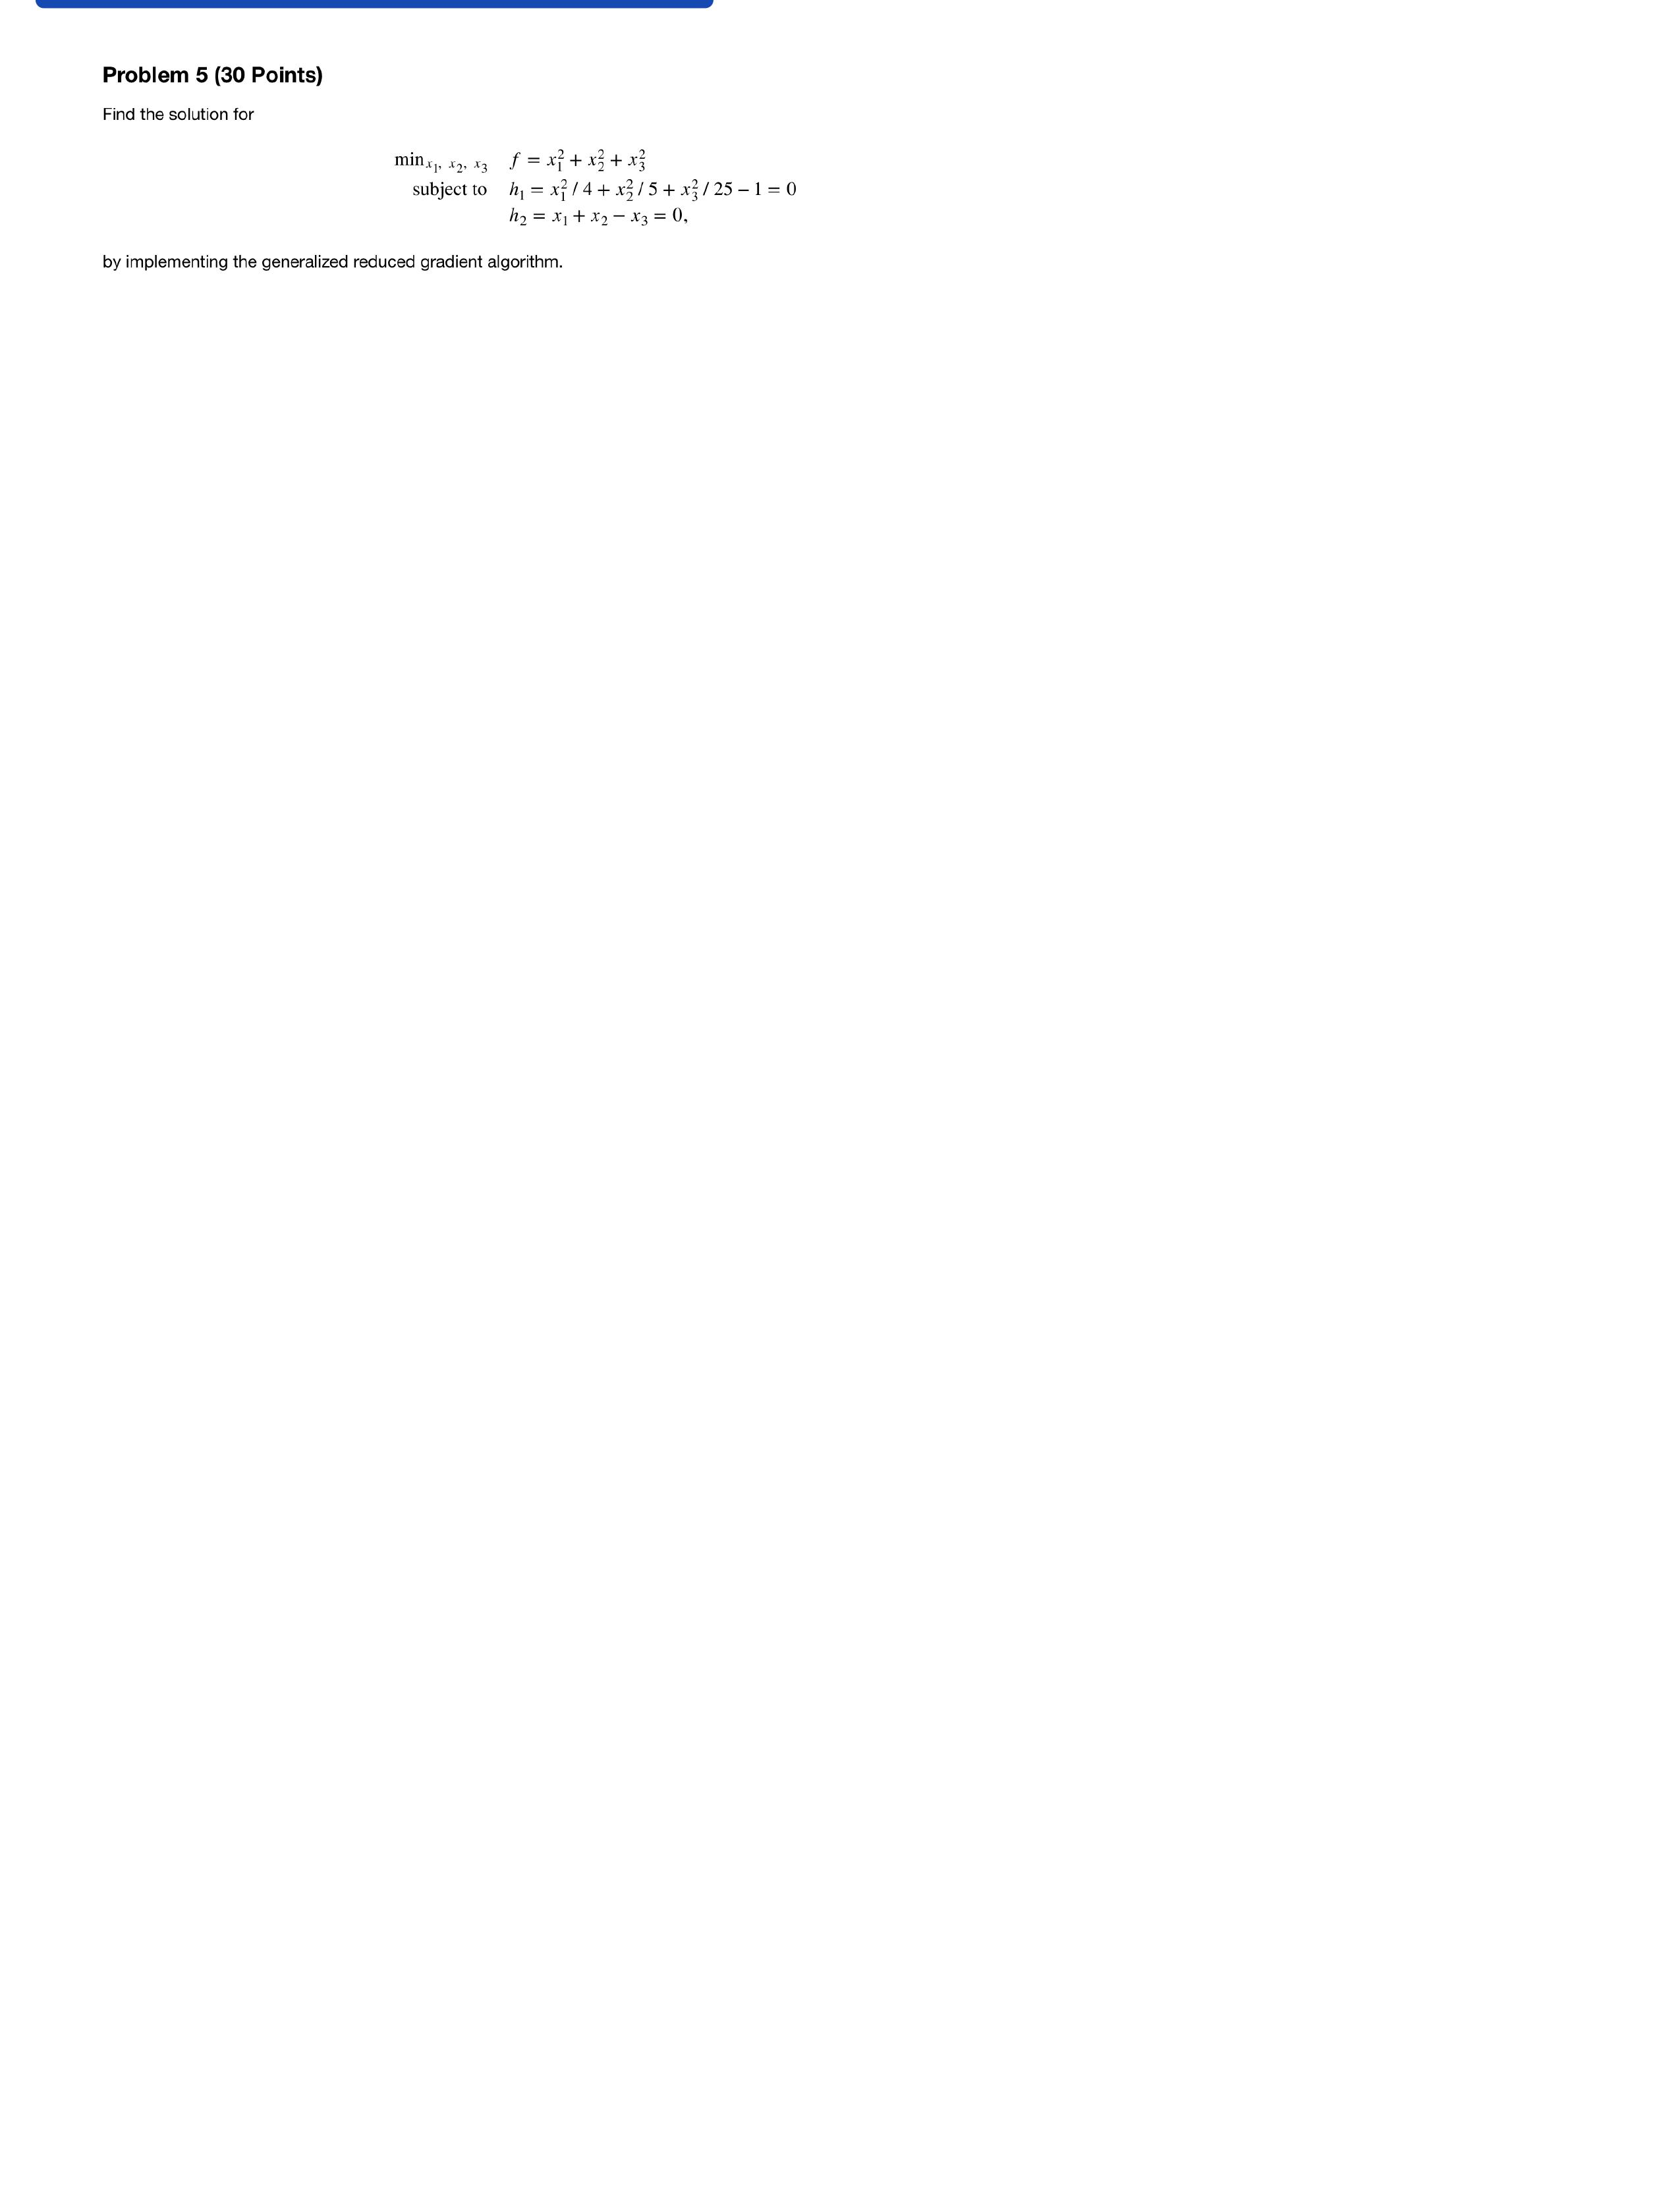

In [2]:
## Calling modules

import numpy as np
import matplotlib as plt
import math

In [3]:
def fun(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    return x1**2+x2**2+x3**2


In [4]:
def Dfdd(x):
    
    return 2*x[0] 

def Dfds(x):
    
    return np.array([2*x[1], 2*x[2]])

def Dhds(x):
    
    return np.array([[.4*x[1], 0.08*x[2]],[1, -1]])

def Dhdd(x):
    
    return np.array([[x[0]/2],[1]])

def Dfdd(x):
    
    return Dfdd(x) - np.matmul( np.matmul(Dfds(x), np.linalg.inv(Dhds(x))), Dhdd(x) )

def xeval(x,a,dfdd): 
    
    d1= (x[0]-a*dfdd)[0]
    s1= x[1:3] + a* np.transpose( np.matmul(  np.matmul(numpy.linalg.inv(Dhds(x)) , Dhdd(x) ), np.transpose([Dfdd(x)]) ) )[0]
    return np.append(d1,s1)            

In [ ]:
def ls(dfdd, x):
    a=1
    b=.5
    t=.3
    while fun(xeval(x,a,dfdd)) > (fun(x) - a*t* dfdd**2):
        a=b*a
    return a

def solve(x):  
    while np.linalg.norm(np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ]))  > e:
        dhds=Dhds(x)
        skj1= np.transpose( np.transpose([x[1:3]]) - np.matmul( np.linalg.inv(dhds), np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ])   )) 
        x=np.append(x[0:1], np.transpose(skj1[0]))
    return x
        

x1=0
x3= 1/12 * ( (600-170*(x1**2))**(1/2) +10*x1)
x2= x3-x1

x0=np.array([x1, x2, x3])  
xfinal=[x0]
err=[]

while np.linalg.norm(Dfdd(xfinal[-1])) >10**(-3):
    x=xfinal[-1]
    dfdd=Dfdd(x)
    err.append(math.log(np.linalg.norm(dfdd)))  
    a= ls(dfdd, x)
    dk= x[0]- a*dfdd
    sk0= x[1:3] + a* np.transpose(  np.matmul(np.matmul(np.linalg.inv(Dhds(x)), Dhdd(x)),  np.transpose(dfdd)) )
    xk0=np.append(dk,sk0)
    x = solve(xk0)
    xfinal.append(x)

    
print('Solution ' +str(xfinal[-1]))
print('Hello World')

Professor as I was working in the code my jupyter notebook broke and is now shwowing "Dead Kernel" I don't know what that means but I am sure that this code works since it was giving me an answer of [-1.57574884  1.37815889 -0.19758995] before it stopped running.

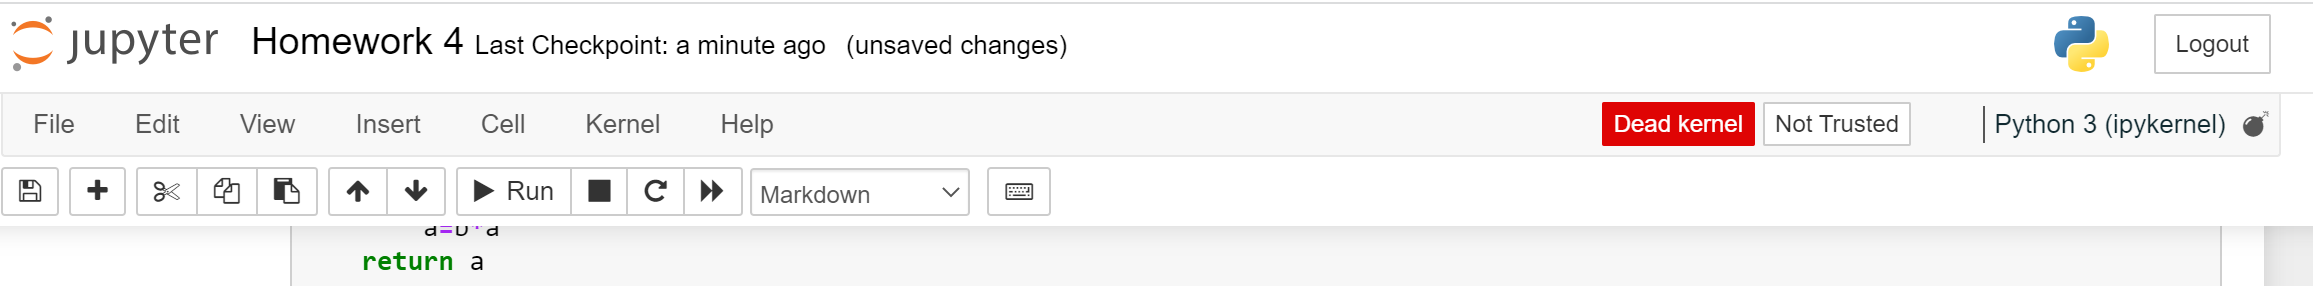